<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#로지스틱-회귀분석-과제" data-toc-modified-id="로지스틱-회귀분석-과제-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>로지스틱 회귀분석 과제</a></span></li></ul></div>

# 로지스틱 회귀분석 과제 

- 1) 타이타닉 데이터를 불러오고 survived를 종속변수(y)로, 나머지 변수들은 독립변수(X)로 설정하세요 


In [103]:
import pandas as pd 
df_t = pd.read_csv("../data/titanic.csv")
df_t

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,adult_male,embark_town
0,0,3,male,22.0,1,0,7.2500,S,Third,True,Southampton
1,1,1,female,38.0,1,0,71.2833,C,First,False,Cherbourg
2,1,3,female,26.0,0,0,7.9250,S,Third,False,Southampton
3,1,1,female,35.0,1,0,53.1000,S,First,False,Southampton
4,0,3,male,35.0,0,0,8.0500,S,Third,True,Southampton
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,True,Southampton
887,1,1,female,19.0,0,0,30.0000,S,First,False,Southampton
888,0,3,female,NaN,1,2,23.4500,S,Third,False,Southampton
889,1,1,male,26.0,0,0,30.0000,C,First,True,Cherbourg


In [104]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   adult_male   891 non-null    bool   
 10  embark_town  889 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 70.6+ KB


In [105]:
df_t.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [106]:
df_t.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
adult_male       0
embark_town      2
dtype: int64

In [84]:
df_t = df_t.dropna(axis=0) # 결측치가 있는 행 삭제
df_t = df_t.drop(['adult_male', 'embark_town', 'class'], axis=1) # 의미가 같은 변수 3개 삭제

In [85]:
X = df_t.drop(['survived'], axis=1)
y = df_t.survived

In [86]:
X.head()

,pclass,sex,age,sibsp,parch,fare,embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [87]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

In [88]:
print(X.shape, y.shape)

(712, 7) (712,)


- 2) X의 결측치가 존재하는 행을 삭제하고, 범주형 변수를 더미변수화 시키세요 

In [89]:
X.isnull().sum()

pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64

In [90]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    712 non-null    int64  
 1   sex       712 non-null    object 
 2   age       712 non-null    float64
 3   sibsp     712 non-null    int64  
 4   parch     712 non-null    int64  
 5   fare      712 non-null    float64
 6   embarked  712 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 44.5+ KB


In [91]:
X.head()

,pclass,sex,age,sibsp,parch,fare,embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [92]:
# sex, embarked 더미변수화
X = pd.get_dummies(X, columns= ['sex', 'embarked'])
X.head()

,pclass,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


- 3) 독립변수(X)를 StandardScaler를 통해 변환하세요 

In [101]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(type(scaler))

<class 'sklearn.preprocessing._data.StandardScaler'>


In [102]:
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
X_scaled

,pclass,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,0.908600,-0.527669,0.522511,-0.506787,-0.516380,-0.756138,0.756138,-0.472618,-0.202326,0.534040
1,-1.482983,0.577094,0.522511,-0.506787,0.694046,1.322511,-1.322511,2.115874,-0.202326,-1.872519
2,0.908600,-0.251478,-0.552714,-0.506787,-0.503620,1.322511,-1.322511,-0.472618,-0.202326,0.534040
3,-1.482983,0.369951,0.522511,-0.506787,0.350326,1.322511,-1.322511,-0.472618,-0.202326,0.534040
4,0.908600,0.369951,-0.552714,-0.506787,-0.501257,-0.756138,0.756138,-0.472618,-0.202326,0.534040
...,...,...,...,...,...,...,...,...,...,...
707,0.908600,0.646142,-0.552714,5.350885,-0.102875,1.322511,-1.322511,-0.472618,4.942527,-1.872519
708,-0.287191,-0.182430,-0.552714,-0.506787,-0.407687,-0.756138,0.756138,-0.472618,-0.202326,0.534040
709,-1.482983,-0.734812,-0.552714,-0.506787,-0.086335,1.322511,-1.322511,-0.472618,-0.202326,0.534040
710,-1.482983,-0.251478,-0.552714,-0.506787,-0.086335,-0.756138,0.756138,2.115874,-0.202326,-1.872519


In [95]:
X.shape

(712, 10)

In [96]:
y.shape

(712,)

- 4) X와 y를 홀드아웃 기법을 사용하여 7:3으로 분할하세요 

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, train_size = 0.7,
                                                    test_size = 0.3, random_state=777)

In [98]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((498, 10), (214, 10), (498,), (214,))

- 5) X_train과 y_train을 가지고 로지스틱 회귀분석모델을 만드세요

In [99]:
import statsmodels.api as sm
model = sm.Logit(y_train, X_train)
result = model.fit()

ValueError: The indices for endog and exog are not aligned

In [17]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
model

LogisticRegression()

- 6) 변수선택법을 통해 최적의 회귀 방정식을 구하고, 유의한 변수만을 추출하세요. (변수선택법은 복사 붙여넣기) 

In [18]:
import time
import itertools
import statsmodels.api as sm
def processSubset(X,y, feature_set):
            model = sm.Logit(y,X[list(feature_set)]) # Modeling
            regr = model.fit() # 모델 학습
            AIC = regr.aic # 모델의 AIC
            return {"model":regr, "AIC":AIC}
        
'''
전진선택법
'''
def forward(X, y, predictors):
    
    # 데이터 변수들이 미리정의된 predictors에 있는지 없는지 확인 및 분류
    remaining_predictors = [p for p in X.columns if p not in predictors]
    results = []
    for p in remaining_predictors:
        results.append(processSubset(X=X, y= y, feature_set=predictors+[p]))
        
    # 데이터프레임으로 변환
    models = pd.DataFrame(results)

    # AIC가 가장 낮은 것을 선택
    best_model = models.loc[models['AIC'].argmin()] # index

    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in")
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model

'''
후진소거법
'''
def backward(X,y,predictors):
    tic = time.time()
    results = []
    
    # 데이터 변수들이 미리정의된 predictors 조합 확인
    for combo in itertools.combinations(predictors, len(predictors) - 1):
        results.append(processSubset(X=X, y= y,feature_set=list(combo)))
    models = pd.DataFrame(results)
    
    # 가장 낮은 AIC를 가진 모델을 선택
    best_model = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors) - 1, "predictors in",
          (toc - tic))
    print('Selected predictors:',best_model['model'].model.exog_names,' AIC:',best_model[0] )
    return best_model



'''
단계적 선택법
'''

def Stepwise_model(X,y):
    Stepmodels = pd.DataFrame(columns=["AIC", "model"])
    tic = time.time()
    predictors = [X.columns[0]]
    Smodel_before = processSubset(X,y,predictors)['AIC']
    # 변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(X.columns) + 1):
        Forward_result = forward(X=X, y=y, predictors=predictors) # constant added
        print('forward')
        Stepmodels.loc[i] = Forward_result
        predictors = Stepmodels.loc[i]["model"].model.exog_names
        predictors = [ k for k in predictors]
        Backward_result = backward(X=X, y=y, predictors=predictors)
        if Backward_result['AIC']< Forward_result['AIC']:
            Stepmodels.loc[i] = Backward_result
            predictors = Stepmodels.loc[i]["model"].model.exog_names
            Smodel_before = Stepmodels.loc[i]["AIC"]
            predictors = [ k for k in predictors]
            print('backward')
        if Stepmodels.loc[i]['AIC']> Smodel_before:
            break
        else:
            Smodel_before = Stepmodels.loc[i]["AIC"]
    toc = time.time()
    print("Total elapsed time:", (toc - tic), "seconds.")
    return (Stepmodels['model'][len(Stepmodels['model'])])

In [20]:
X_test.head()

,pclass,age,sibsp,parch,fare,adult_male,sex_female,sex_male,embarked_C,embarked_Q,embarked_S,class_First,class_Second,class_Third,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
634,0.908600,0.024713,-0.552714,-0.506787,-0.516773,0.850865,-0.756138,0.756138,2.115874,-0.202326,-1.872519,-0.590326,-0.566538,1.002813,2.115874,-0.202326,-1.872519
192,-0.287191,0.231856,-0.552714,-0.506787,-0.421392,0.850865,-0.756138,0.756138,-0.472618,-0.202326,0.534040,-0.590326,1.765108,-0.997195,-0.472618,-0.202326,0.534040
680,-0.287191,0.991380,0.522511,-0.506787,-0.161947,-1.175275,1.322511,-1.322511,-0.472618,-0.202326,0.534040,-0.590326,1.765108,-0.997195,-0.472618,-0.202326,0.534040
695,-1.482983,0.231856,-0.552714,-0.506787,-0.558912,0.850865,-0.756138,0.756138,-0.472618,-0.202326,0.534040,1.693979,-0.566538,-0.997195,-0.472618,-0.202326,0.534040
588,-1.482983,-0.596716,1.597735,1.836282,4.306266,-1.175275,1.322511,-1.322511,2.115874,-0.202326,-1.872519,1.693979,-0.566538,-0.997195,2.115874,-0.202326,-1.872519


In [29]:
Stepwise_best_model = Stepwise_model(X_train, y_train)
y_pred_proba = Stepwise_best_model.predict(X_test)
y_pred_proba

ValueError: The indices for endog and exog are not aligned

- 6) X_test값을 가지고 y_predict값을 구한 후 혼동행렬을 만드세요 

In [21]:
y_predict = model.predict(X_test)
y_predict

array([0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

In [26]:
y_predict_proba = model.predict_proba(X_test)
y_predict_proba = list(map(lambda x : x[0], y_predict_proba))
y_predict_proba

[0.8737315696456006,
 0.7760448581980657,
 0.3022335049366134,
 0.5522853684389274,
 0.06017168814333651,
 0.9160042553641,
 0.9521248202238738,
 0.15671668624890256,
 0.08883125637270639,
 0.9521594754953645,
 0.4412496429204116,
 0.8904740369690042,
 0.9196229979237216,
 0.7194001968956094,
 0.7562873533258737,
 0.588077881861544,
 0.35454398906165463,
 0.05069787134036918,
 0.8293711492928525,
 0.5092880759723724,
 0.6045448615954847,
 0.3030857977342508,
 0.684999616447298,
 0.5266615289960219,
 0.40432913981242113,
 0.0957155979208989,
 0.9219884291758638,
 0.8238619206743303,
 0.8416507441688499,
 0.7795961497284738,
 0.5093674090139415,
 0.13979089183070526,
 0.938945624951889,
 0.31694591133111316,
 0.27054666615934564,
 0.27032843803994855,
 0.8990451921739047,
 0.17442809868085207,
 0.7443453187636477,
 0.48991152933765403,
 0.856588798130057,
 0.5490505520236143,
 0.8699172875076645,
 0.9501432018628632,
 0.9373422984009212,
 0.8174701082305993,
 0.6043304261132245,
 0.72596

In [30]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
cm = confusion_matrix(y_test, y_predict)
cm

array([[118,   9],
       [ 22,  65]], dtype=int64)

In [31]:
help(confusion_matrix)

Help on function confusion_matrix in module sklearn.metrics._classification:

confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)
    Compute confusion matrix to evaluate the accuracy of a classification.
    
    By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
    is equal to the number of observations known to be in group :math:`i` and
    predicted to be in group :math:`j`.
    
    Thus in binary classification, the count of true negatives is
    :math:`C_{0,0}`, false negatives is :math:`C_{1,0}`, true positives is
    :math:`C_{1,1}` and false positives is :math:`C_{0,1}`.
    
    Read more in the :ref:`User Guide <confusion_matrix>`.
    
    Parameters
    ----------
    y_true : array-like of shape (n_samples,)
        Ground truth (correct) target values.
    
    y_pred : array-like of shape (n_samples,)
        Estimated targets as returned by a classifier.
    
    labels : array-like of shape (n_classes), default=

In [32]:
cmtb = pd.DataFrame(cm, columns = ['predicted_not_survived', 'predicted_survived'],
                    index = ['not_survived', 'survived'])
cmtb

,predicted_not_survived,predicted_survived
not_survived,118,9
survived,22,65


- 7) X_test값을 가지고 y_predict_proba 값을 구한 후 roc_auc_score를 구하고 해석하세요 

In [41]:
y_predict_proba = model.predict_proba(X_test)
y_predict_proba = list(map(lambda x : x[1], y_predict_proba))
y_predict_proba

[0.12626843035439936,
 0.22395514180193438,
 0.6977664950633866,
 0.4477146315610726,
 0.9398283118566635,
 0.08399574463589997,
 0.04787517977612616,
 0.8432833137510974,
 0.9111687436272936,
 0.047840524504635495,
 0.5587503570795884,
 0.10952596303099583,
 0.08037700207627846,
 0.2805998031043906,
 0.24371264667412626,
 0.41192211813845603,
 0.6454560109383454,
 0.9493021286596308,
 0.17062885070714753,
 0.4907119240276277,
 0.39545513840451535,
 0.6969142022657492,
 0.31500038355270193,
 0.4733384710039781,
 0.5956708601875789,
 0.9042844020791011,
 0.07801157082413619,
 0.17613807932566966,
 0.1583492558311501,
 0.22040385027152623,
 0.49063259098605844,
 0.8602091081692947,
 0.06105437504811095,
 0.6830540886688868,
 0.7294533338406544,
 0.7296715619600515,
 0.10095480782609535,
 0.8255719013191479,
 0.2556546812363523,
 0.510088470662346,
 0.14341120186994302,
 0.4509494479763857,
 0.13008271249233552,
 0.04985679813713687,
 0.06265770159907882,
 0.18252989176940074,
 0.39566957

In [42]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, f1_score

print('Accuracy :', accuracy_score(y_test, y_predict))
print('Sensitivity(recall) : ', recall_score(y_test, y_predict))
print('Precision_score : ', precision_score(y_test, y_predict))
print('f1_score : ', f1_score(y_test, y_predict))
print('roc_auc_score : ', roc_auc_score(y_test, y_predict))

Accuracy : 0.8551401869158879
Sensitivity(recall) :  0.7471264367816092
Precision_score :  0.8783783783783784
f1_score :  0.8074534161490683
roc_auc_score :  0.838130147524663


In [46]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def draw_roc(test_y, pred_y, model_name):
    fpr, tpr, thr = roc_curve(test_y, pred_y)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color = 'darkorange', lw = lw, label = 'ROC curve(area = %0.2f)' %roc_auc)
    plt.plot([0,1], [0,1], color = 'navy', lw = lw, linestyle = '--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic {}'.format(model_name))
    plt.legend(loc = 'lower right')
    plt.ion()
    plt.tight_layout()
    plt.show()

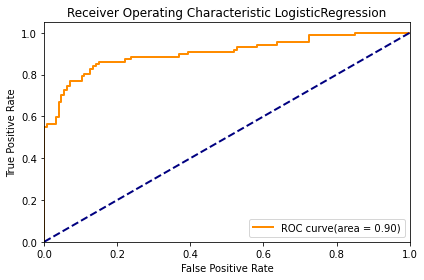

In [47]:
draw_roc(y_test, y_predict_proba, "LogisticRegression")

- 7) 회귀계수를 구하고, 유의한 회귀계수의 값을 설명하세요 

In [48]:
import statsmodels.api as sm
model = sm.Logit(y_train, X_train)
result = model.fit()

ValueError: The indices for endog and exog are not aligned